### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,b_piece_activity,w_doubled_pawns,b_doubled_pawns,doubled_pawns_diff,w_isolated_pawns,b_isolated_pawns,isolated_pawns_diff,both_castled_early,total_captures_early,activity_diff
0,2404,2534,0,0,130,2469.0,0,-130,0,20.0,...,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0,11.0,1.0
1,2752,2395,2,0,357,2573.5,1,357,0,16.0,...,27.0,0.0,0.0,0.0,3.0,1.0,2.0,0,18.0,0.0
2,2558,2685,2,0,127,2621.5,0,-127,1,22.0,...,32.0,0.0,0.0,0.0,0.0,1.0,-1.0,0,14.0,-2.0
3,2514,2351,0,0,163,2432.5,1,163,0,6.0,...,23.0,0.0,0.0,0.0,0.0,1.0,-1.0,0,20.0,-2.0
4,2582,2494,2,0,88,2538.0,1,88,0,18.0,...,41.0,1.0,0.0,1.0,4.0,0.0,4.0,0,17.0,-6.0


### 2. Prepare data

In [3]:
X = df.drop(["ResultNumeric"], axis=1)
y = df["ResultNumeric"]

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (1686173, 63)
Target: (1686173,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,
    stratify=y,
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(
    f"Training completed in {training_time:.2f} seconds ({training_time / 60:.2f} minutes)"
)

Training completed in 114.14 seconds (1.90 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)\n")

print("Classification Report: \n")
print(
    classification_report(
        y_test, y_pred, target_names=["Black Win", "Draw", "White Win"]
    )
)

Accuracy: 0.6355 (63.55%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.62      0.71      0.66    132965
        Draw       0.73      0.32      0.44     64732
   White Win       0.63      0.71      0.67    139538

    accuracy                           0.64    337235
   macro avg       0.66      0.58      0.59    337235
weighted avg       0.65      0.64      0.62    337235



### 6. Confusion Matrix

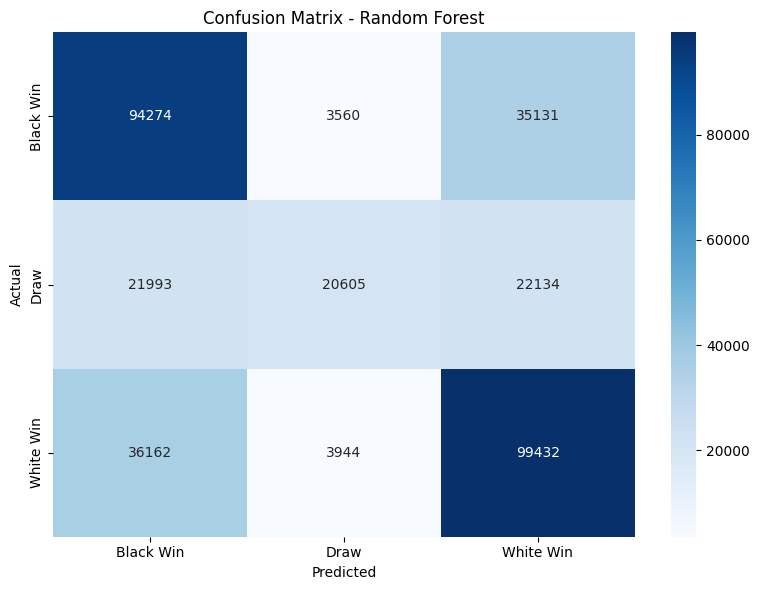

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Black Win", "Draw", "White Win"],
    yticklabels=["Black Win", "Draw", "White Win"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                 Feature  Importance
10   material_diff_early    0.145456
4              AvgRating    0.077751
1               BlackElo    0.077495
6   WhiteRatingAdvantage    0.075841
0               WhiteElo    0.073663
..                   ...         ...
24              b_queens    0.001316
28      bishop_pair_diff    0.001157
27     b_has_bishop_pair    0.000619
26     w_has_bishop_pair    0.000603
60    both_castled_early    0.000446

[63 rows x 2 columns]


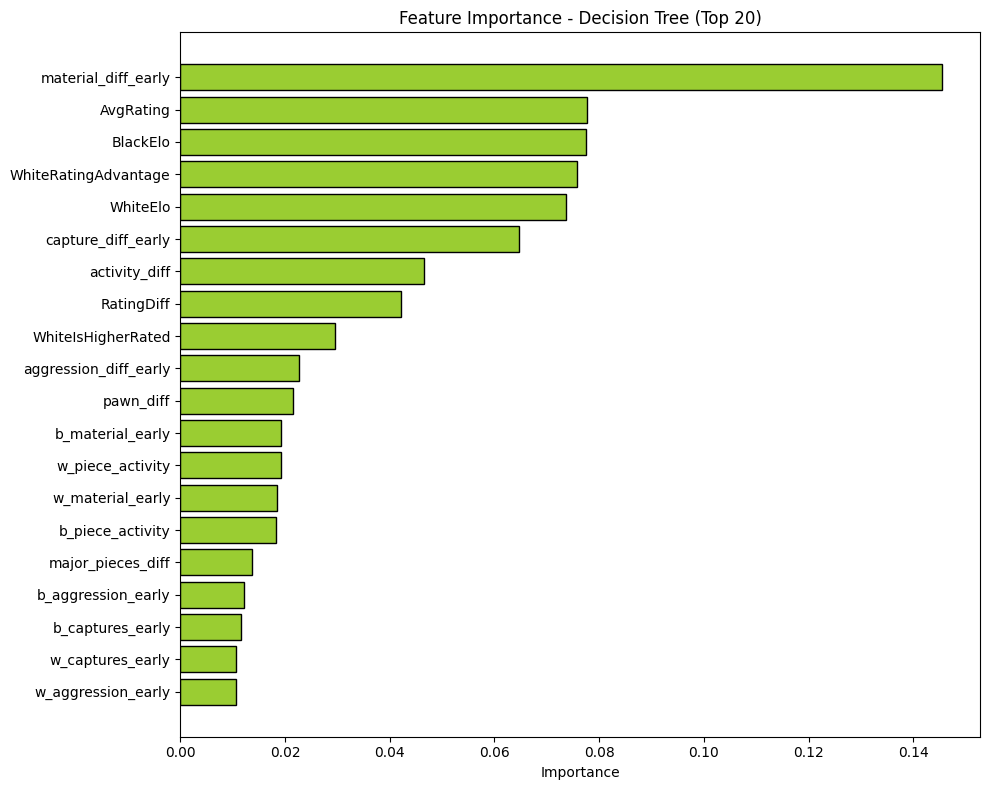

In [9]:
importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": rf_model.feature_importances_}
).sort_values("Importance", ascending=False)

print("\nFeature Importance:")
print(importance_df)

k = 20
topk = importance_df.head(k)

plt.figure(figsize=(10, 0.4 * k))
plt.barh(topk["Feature"], topk["Importance"], color="yellowgreen", edgecolor="black")
plt.xlabel("Importance")
plt.title(f"Feature Importance - Decision Tree (Top {k})")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()